<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bubble Plots**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be directly loaded into pandas for analysis and visualization.

You will use various visualization techniques to explore the data and uncover key trends.


このラボでは、データの視覚化に焦点を当てます。

データセットは、分析と視覚化のためにパンダに直接ロードされます。

さまざまな視覚化手法を使用して、データを調査し、重要な傾向を明らかにします。

## Objectives


In this lab, you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two data features.

-   Visualize composition of data.

-   Visualize comparison of data.


 - データの分布を視覚化します。

 - 2つのデータ機能間の関係を視覚化します。

 - データの構成を視覚化します。

 - データの比較を視覚化します。

#### Setup: Working with the Database
**Install and import the needed libraries**


In [2]:
# !pip install pandas 
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})



**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

# Load the data
df = pd.read_csv(url)

# Display the first few rows of the data to understand its structure
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [7]:
def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 18
    elif age_str == '18-24 years old':
        return 20
    elif age_str == '25-34 years old':
        return 30
    elif age_str == '35-44 years old':
        return 40
    elif age_str == '45-54 years old':
        return 50
    elif age_str == '55-64 years old':
        return 60
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Age
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)
pd.concat([df['Age'], df['Age_numeric']], axis=1).head(10)

df['Age_numeric']

0        18.0
1        40.0
2        50.0
3        20.0
4        20.0
         ... 
65432    20.0
65433    30.0
65434    30.0
65435    20.0
65436    20.0
Name: Age_numeric, Length: 65437, dtype: float64

### Task 1: Exploring Data Distributions Using Bubble Plots


#### 1. Bubble Plot for Age vs. Frequency of Participation


- Visualize the relationship between respondents’ age and their participation frequency (`SOPartFreq`) using a bubble plot.

- Use the size of the bubbles to represent their job satisfaction (`JobSat`).


 - バブルプロットを使用して、回答者の年齢と参加頻度（sopartfreq`）の関係を視覚化します。

 - 泡のサイズを使用して、仕事の満足度（「Jovesat」）を表します。

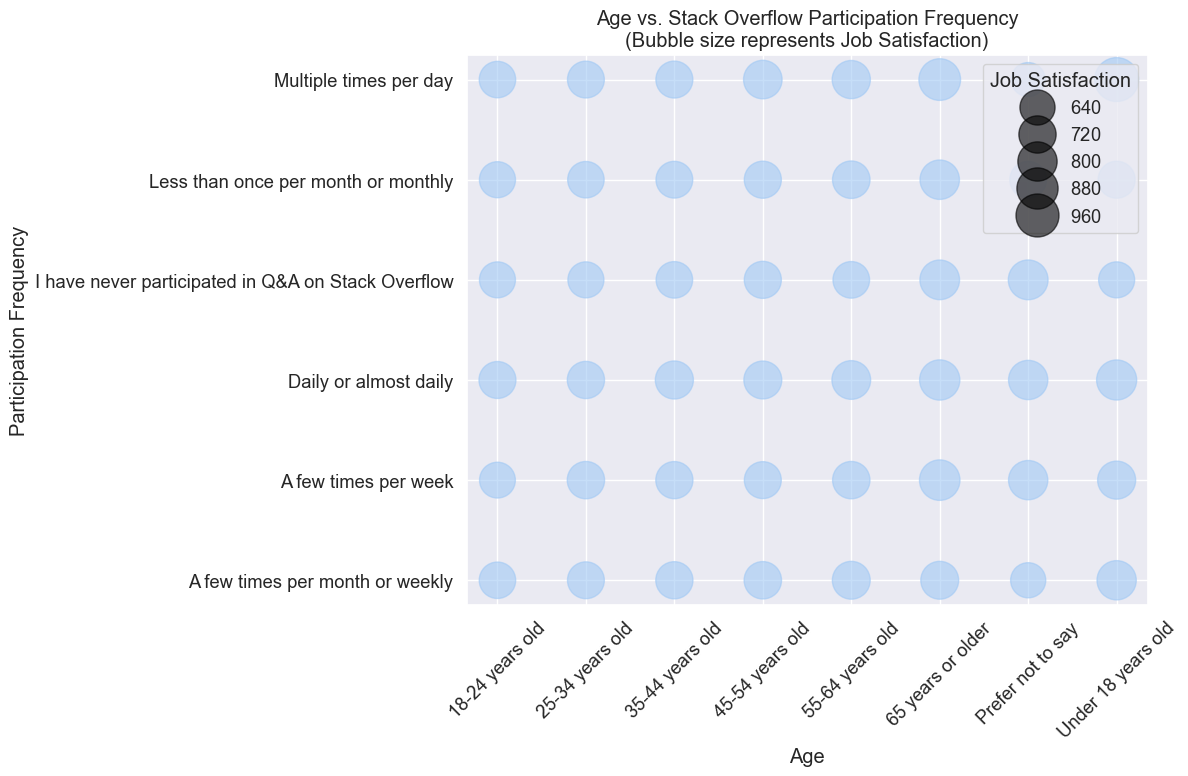

In [4]:
##Write your code here

# Task 1.1: Age vs. Frequency of Participation
# データの前処理
age_freq = df.groupby(['Age', 'SOPartFreq']).size().reset_index(name='count')
age_freq['JobSat'] = df.groupby(['Age', 'SOPartFreq'])['JobSat'].mean().values

# プロットの作成
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=age_freq['Age'],
    y=age_freq['SOPartFreq'],
    s=age_freq['JobSat'] * 100,  # バブルのサイズをJobSatで調整
    alpha=0.6
)

plt.title('Age vs. Stack Overflow Participation Frequency\n(Bubble size represents Job Satisfaction)')
plt.xlabel('Age')
plt.ylabel('Participation Frequency')
plt.xticks(rotation=45)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Job Satisfaction",
          loc="upper right")

plt.tight_layout()
plt.show()


#### 2. Bubble Plot for Compensation vs. Job Satisfaction


-Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSat`).

- Use the size of the bubbles to represent respondents’ age.


 - 毎年の補償（「compcearlyly」と仕事の満足度（ `jowsat」）との関係を存在させます。

 - 泡のサイズを使用して、回答者の年齢を表します。

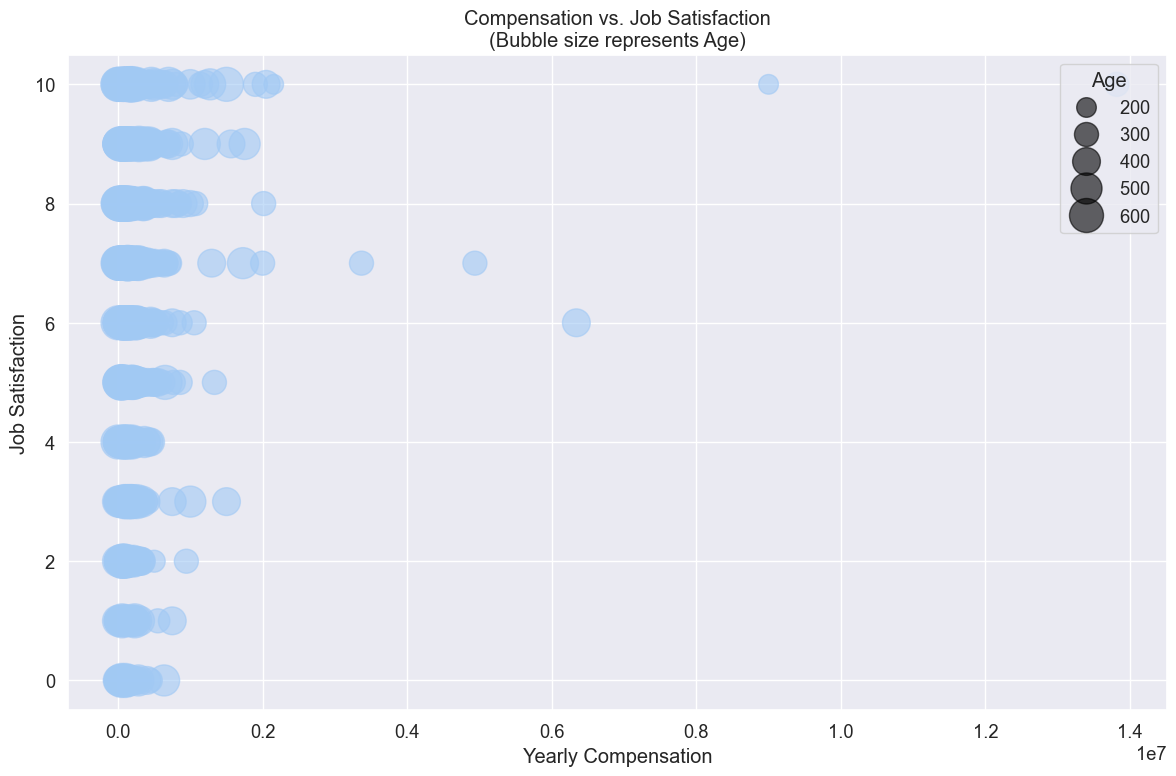

In [10]:
##Write your code here

# Task 1.2: Compensation vs. Job Satisfaction
# データの前処理
comp_sat = df.groupby(['ConvertedCompYearly', 'JobSat']).size().reset_index(name='count')
comp_sat['Age_numeric'] = df.groupby(['ConvertedCompYearly', 'JobSat'])['Age_numeric'].mean().values

# プロットの作成
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=comp_sat['ConvertedCompYearly'],
    y=comp_sat['JobSat'],
    s=comp_sat['Age_numeric'] * 10,  # バブルのサイズをAgeで調整
    alpha=0.6
)

plt.title('Compensation vs. Job Satisfaction\n(Bubble size represents Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Age",
          loc="upper right")

plt.tight_layout()
plt.show()



### Task 2: Analyzing Relationships Using Bubble Plots


#### 1. Bubble Plot of Technology Preferences by Age

- Visualize the popularity of programming languages respondents have worked with (`LanguageHaveWorkedWith`) across age groups.

- Use bubble size to represent the frequency of each language.



#### 1。年齢別のテクノロジー選好のバブルプロット

 - プログラミング言語の人気を視覚化すると、回答者は年齢層で（ `LanguageHaveworked」（言語ハーブワーク）と協力してきました。

 - バブルサイズを使用して、各言語の頻度を表します。

In [ ]:
##Write your code here

# Task 2.1: Technology Preferences by Age
# データの前処理
# LanguageHaveWorkedWithカラムを分割して処理
languages = df['LanguageHaveWorkedWith'].str.split(';').explode()
age_lang = pd.DataFrame({
    'Age': df['Age_numeric'].repeat(languages.str.len()),
    'Language': languages
})

# 集計
lang_age_freq = age_lang.groupby(['Language', 'Age']).size().reset_index(name='count')

# プロットの作成
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    x=lang_age_freq['Language'],
    y=lang_age_freq['Age'],
    s=lang_age_freq['count'] * 10,  # バブルのサイズを頻度で調整
    alpha=0.6
)

plt.title('Programming Language Preferences by Age\n(Bubble size represents frequency)')
plt.xlabel('Programming Language')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Frequency",
          loc="upper right")

plt.tight_layout()
plt.show()



#### 2. Bubble Plot for Preferred Databases vs. Job Satisfaction

- Explore the relationship between preferred databases (`DatabaseWantToWorkWith`) and job satisfaction.

- Use bubble size to indicate the number of respondents for each database.


#### 2。優先データベースと仕事の満足度のバブルプロット

 - 優先データベース（ `DatabaseWantToworkWith`）と仕事の満足度との関係を調べます。

 - バブルサイズを使用して、各データベースの回答者の数を示します。

In [ ]:
##Write your code here

# Task 2.2: Preferred Databases vs. Job Satisfaction
# データの前処理
# DatabaseWantToWorkWithカラムを分割して処理
databases = df['DatabaseWantToWorkWith'].str.split(';').explode()
db_sat = pd.DataFrame({
    'Database': databases,
    'JobSat': df['JobSat'].repeat(databases.str.len())
})

# 集計
db_sat_freq = db_sat.groupby(['Database', 'JobSat']).size().reset_index(name='count')

# プロットの作成
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=db_sat_freq['Database'],
    y=db_sat_freq['JobSat'],
    s=db_sat_freq['count'] * 10,  # バブルのサイズを回答者数で調整
    alpha=0.6
)

plt.title('Preferred Databases vs. Job Satisfaction\n(Bubble size represents number of respondents)')
plt.xlabel('Database')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Number of Respondents",
          loc="upper right")

plt.tight_layout()
plt.show()


### Task 3: Comparing Data Using Bubble Plots


#### 1. Bubble Plot for Compensation Across Developer Roles

- Visualize compensation (`ConvertedCompYearly`) across different developer roles (`DevType`).

- Use bubble size to represent job satisfaction.


#### 1。開発者の役割全体での補償のバブルプロット

 - さまざまな開発者ロール（ `Devtype`）にわたって補償（「Convertedcompyearly」）を視覚化します。

 - バブルサイズを使用して、仕事の満足度を表します。

In [ ]:
##Write your code here

# Task 3.1: Compensation Across Developer Roles
# データの前処理
# DevTypeカラムを分割して処理
dev_types = df['DevType'].str.split(';').explode()
dev_comp = pd.DataFrame({
    'DevType': dev_types,
    'ConvertedCompYearly': df['ConvertedCompYearly'].repeat(dev_types.str.len()),
    'JobSat': df['JobSat'].repeat(dev_types.str.len())
})

# 集計
dev_comp_sat = dev_comp.groupby(['DevType', 'ConvertedCompYearly']).agg({
    'JobSat': 'mean',
    'DevType': 'count'
}).rename(columns={'DevType': 'count'}).reset_index()

# プロットの作成
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    x=dev_comp_sat['DevType'],
    y=dev_comp_sat['ConvertedCompYearly'],
    s=dev_comp_sat['JobSat'] * 100,  # バブルのサイズをJobSatで調整
    alpha=0.6
)

plt.title('Compensation Across Developer Roles\n(Bubble size represents Job Satisfaction)')
plt.xlabel('Developer Role')
plt.ylabel('Yearly Compensation')
plt.xticks(rotation=45)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Job Satisfaction",
          loc="upper right")

plt.tight_layout()
plt.show()



#### 2. Bubble Plot for Collaboration Tools by Age

- Visualize the relationship between the collaboration tools used (`NEWCollabToolsHaveWorkedWith`) and age groups.

- Use bubble size to represent the frequency of tool usage.


#### 2。年齢別のコラボレーションツールのバブルプロット

 - 使用されているコラボレーションツール（ `NewCollabToolshaveworked」と年齢層の関係を視覚化します。

 - バブルサイズを使用して、ツール使用の頻度を表します。


In [ ]:
##Write your code here

# Task 3.2: Collaboration Tools by Age
# データの前処理
# NEWCollabToolsHaveWorkedWithカラムを分割して処理
collab_tools = df['NEWCollabToolsHaveWorkedWith'].str.split(';').explode()
tool_age = pd.DataFrame({
    'Tool': collab_tools,
    'Age': df['Age'].repeat(collab_tools.str.len())
})

# 集計
tool_age_freq = tool_age.groupby(['Tool', 'Age']).size().reset_index(name='count')

# プロットの作成
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    x=tool_age_freq['Tool'],
    y=tool_age_freq['Age'],
    s=tool_age_freq['count'] * 10,  # バブルのサイズを使用頻度で調整
    alpha=0.6
)

plt.title('Collaboration Tools Usage by Age\n(Bubble size represents frequency of tool usage)')
plt.xlabel('Collaboration Tool')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Frequency",
          loc="upper right")

plt.tight_layout()
plt.show()

### Task 4: Visualizing Technology Trends Using Bubble Plots


#### 1. Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

- Explore the relationship between preferred web frameworks (`WebframeWantToWorkWith`) and job satisfaction.

- Use bubble size to represent the number of respondents.



#### 1。好みのWebフレームワークと仕事の満足度のバブルプロット

 - 好ましいWebフレームワーク（ `webframewanttoworkwith`）と仕事の満足度との関係を調べます。

 - バブルサイズを使用して、回答者の数を表します。

In [ ]:
##Write your code here

# Task 4.1: Preferred Web Frameworks vs. Job Satisfaction
# データの前処理
# WebframeWantToWorkWithカラムを分割して処理
frameworks = df['WebframeWantToWorkWith'].str.split(';').explode()
frame_sat = pd.DataFrame({
    'Framework': frameworks,
    'JobSat': df['JobSat'].repeat(frameworks.str.len())
})

# 集計
frame_sat_freq = frame_sat.groupby(['Framework', 'JobSat']).size().reset_index(name='count')

# プロットの作成
plt.figure(figsize=(15, 10))
scatter = plt.scatter(
    x=frame_sat_freq['Framework'],
    y=frame_sat_freq['JobSat'],
    s=frame_sat_freq['count'] * 10,  # バブルのサイズを回答者数で調整
    alpha=0.6
)

plt.title('Preferred Web Frameworks vs. Job Satisfaction\n(Bubble size represents number of respondents)')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Number of Respondents",
          loc="upper right")

plt.tight_layout()
plt.show()

#### 2. Bubble Plot for Admired Technologies Across Countries

- Visualize the distribution of admired technologies (`LanguageAdmired`) across different countries (`Country`).

- Use bubble size to represent the frequency of admiration.



#### 2。国々の賞賛された技術のバブルプロット

 - さまざまな国（「国」）にわたって賞賛された技術（「言語装備」）の分布を視覚化します。

 - バブルサイズを使用して、賞賛の頻度を表します。

In [ ]:
##Write your code here


# Task 4.2: Admired Technologies Across Countries
# データの前処理
# LanguageAdmiredカラムを分割して処理
languages = df['LanguageAdmired'].str.split(';').explode()
lang_country = pd.DataFrame({
    'Language': languages,
    'Country': df['Country'].repeat(languages.str.len())
})

# 集計
lang_country_freq = lang_country.groupby(['Language', 'Country']).size().reset_index(name='count')

# プロットの作成
plt.figure(figsize=(20, 12))
scatter = plt.scatter(
    x=lang_country_freq['Language'],
    y=lang_country_freq['Country'],
    s=lang_country_freq['count'] * 10,  # バブルのサイズを頻度で調整
    alpha=0.6
)

plt.title('Admired Technologies Across Countries\n(Bubble size represents frequency of admiration)')
plt.xlabel('Programming Language')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.grid(True)

# 凡例の追加
plt.legend(*scatter.legend_elements("sizes", num=5),
          title="Frequency",
          loc="upper right")

plt.tight_layout()
plt.show()


## Final Step: Review


After completing the lab, you will have extensively used bubble plots to gain insights into developer community preferences, demographics, compensation trends, and job satisfaction.


## Summary


After completing this lab, you will be able to:

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
